# problem definition

In [2]:
# we will predict whether a person will get storke or not

## importing neccessary libraries

In [1]:
import pyforest
import plotly.graph_objects as go
from scipy.stats import chi2_contingency,chi2
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
import imblearn

# Reading Data

In [2]:
data = pd.read_csv('/Users/karanam.rama/Downloads/stroke_prediction/stroke_prediction_repo/data/raw/healthcare-dataset-stroke-data.csv')

<IPython.core.display.Javascript object>

In [3]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Data Completeness

In [5]:
data.isnull().sum()

## conclusion
# only bmi has missing values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Data Cleaning

In [6]:
data.groupby('gender').bmi.mean()

gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64

In [7]:
data.groupby('gender').id.count()

gender
Female    2994
Male      2115
Other        1
Name: id, dtype: int64

<IPython.core.display.Javascript object>

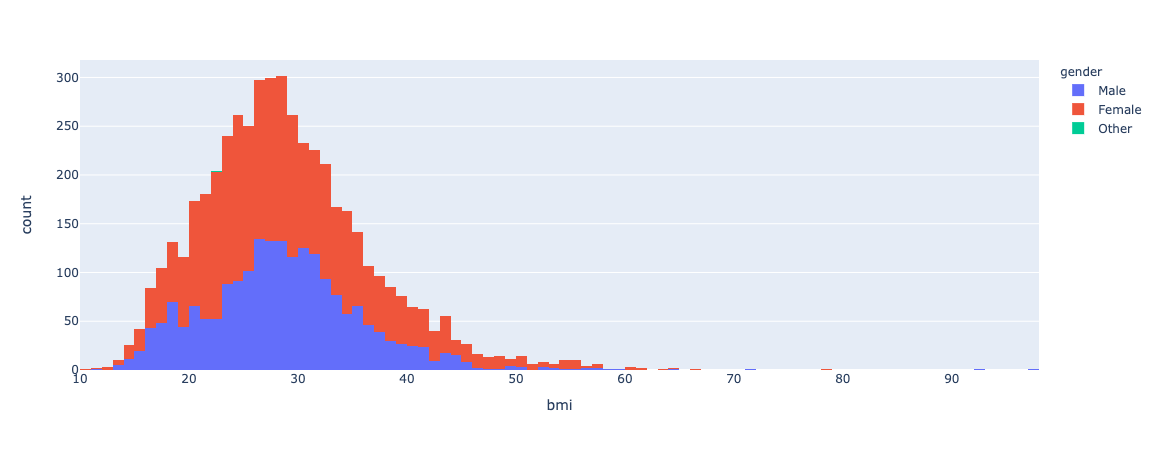

In [8]:
px.histogram(data,x = 'bmi',color = 'gender')

In [9]:
# filling the missing values with the bmi mean value of each gender
data['bmi'] = data.groupby('gender').transform(lambda x : x.fillna(x.mean()))['bmi']

In [10]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.065758   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

In [12]:
data['id'].count()

5110

In [13]:
data.shape

(5110, 12)

In [14]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# Profile Report

In [172]:
report = ProfileReport(data)
report.to_file(output_file = 'stroke_prediction.report.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Selection 

# Data analysis

<IPython.core.display.Javascript object>

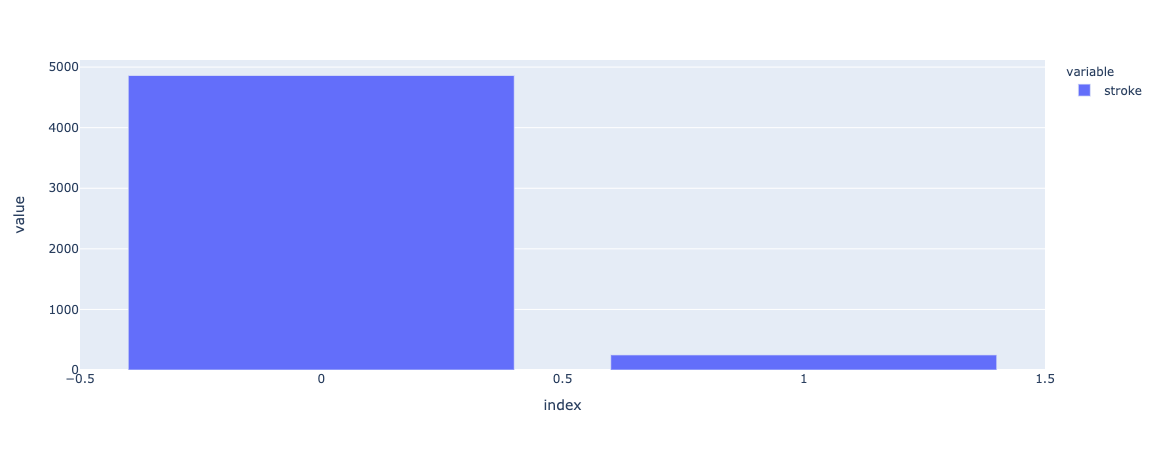

In [14]:
# distribution of stroke values
px.bar(data['stroke'].value_counts())

# # conclusion
# the data is highly imbalanced


In [15]:
df = pd.crosstab(data['gender'],data['stroke'])
df['perc'] = df[1]/(df[0]+df[1])
df

<IPython.core.display.Javascript object>

stroke     0    1      perc
gender                     
Female  2853  141  0.047094
Male    2007  108  0.051064
Other      1    0  0.000000

<IPython.core.display.Javascript object>

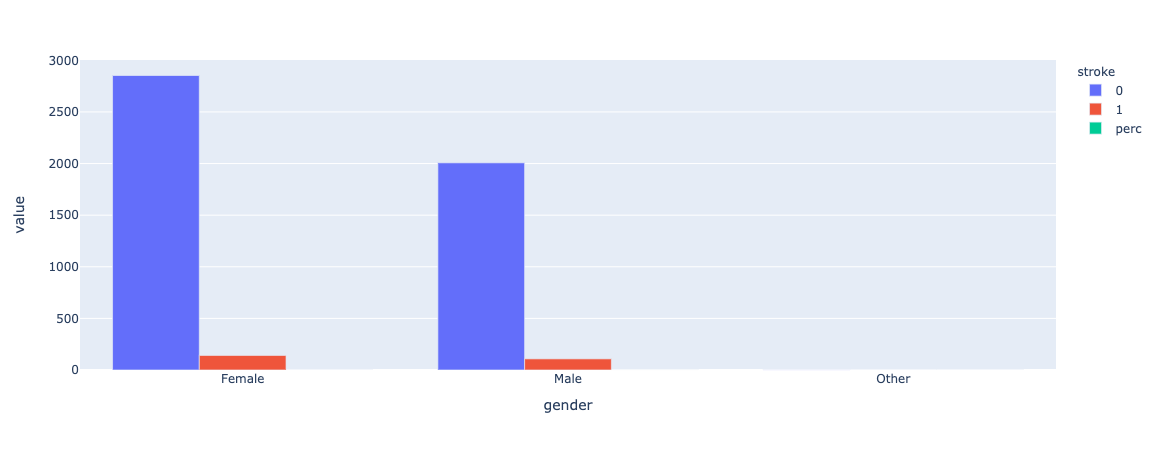

In [18]:
# distribution of strokes w.r.t gender
px.bar(df,barmode = 'group')

In [19]:
# chi square independency test on gender and stroke fields

In [16]:
def chi_square_test(table):
    chi, p, dof, expected = chi2_contingency(table)
    alpha = 0.05 
    if p < alpha :
        value = 'dependent'
    else :
        value = 'independent'
    return (value,p) 

In [17]:
table = pd.crosstab(data['gender'],data['stroke']).to_numpy()
val = chi_square_test(table)
print(val)

<IPython.core.display.Javascript object>

('independent', 0.7895490538408245)


# conclusion

a person's possibility of getting a stroke is not affected by the gender of that person

In [20]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.065758   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

<IPython.core.display.Javascript object>

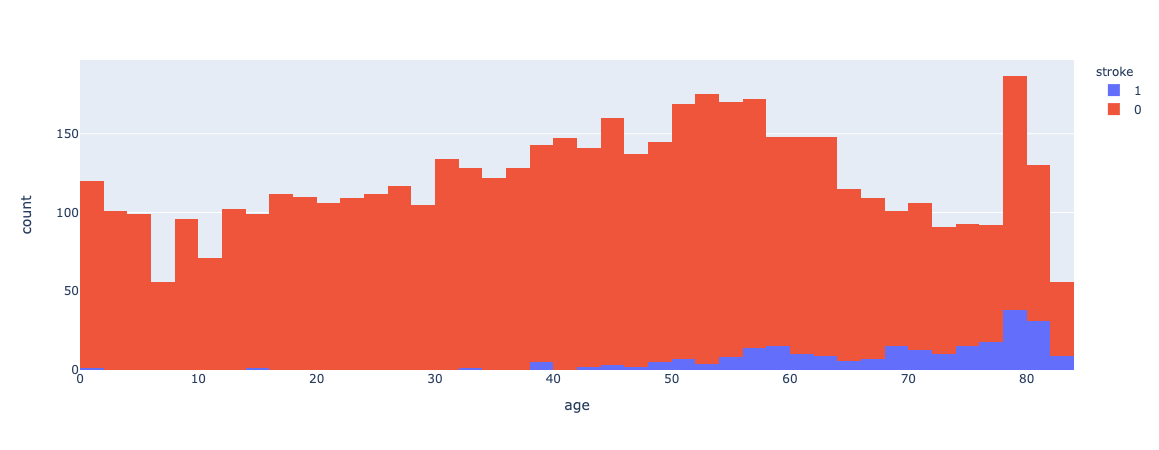

In [21]:
px.histogram(data,x = 'age',color = 'stroke')

In [22]:
data['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [23]:
data['age_group'] = pd.cut(data['age'],bins = [0,12,18,45,60,100],labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])

<IPython.core.display.Javascript object>

In [24]:
data['age_group'].value_counts()

Adults        1702
Elderly       1304
Mid Adults    1188
Children       588
Teens          328
Name: age_group, dtype: int64

In [25]:
cdf = pd.crosstab(data['age_group'],data['stroke'])
cdf['perc'] = cdf[1]/(cdf[0]+cdf[1])
cdf['age_group'] = cdf.index
cdf

<IPython.core.display.Javascript object>

stroke         0    1      perc   age_group
age_group                                  
Children     587    1  0.001701    Children
Teens        327    1  0.003049       Teens
Adults      1691   11  0.006463      Adults
Mid Adults  1129   59  0.049663  Mid Adults
Elderly     1127  177  0.135736     Elderly

In [26]:
data[(data['age_group']=='Children')&(data['stroke']==1)]


id  gender   age  hypertension  heart_disease ever_married work_type  \
162  69768  Female  1.32             0              0           No  children   

    Residence_type  avg_glucose_level        bmi smoking_status  stroke  \
162          Urban              70.37  29.065758        Unknown       1   

    age_group  
162  Children

<IPython.core.display.Javascript object>

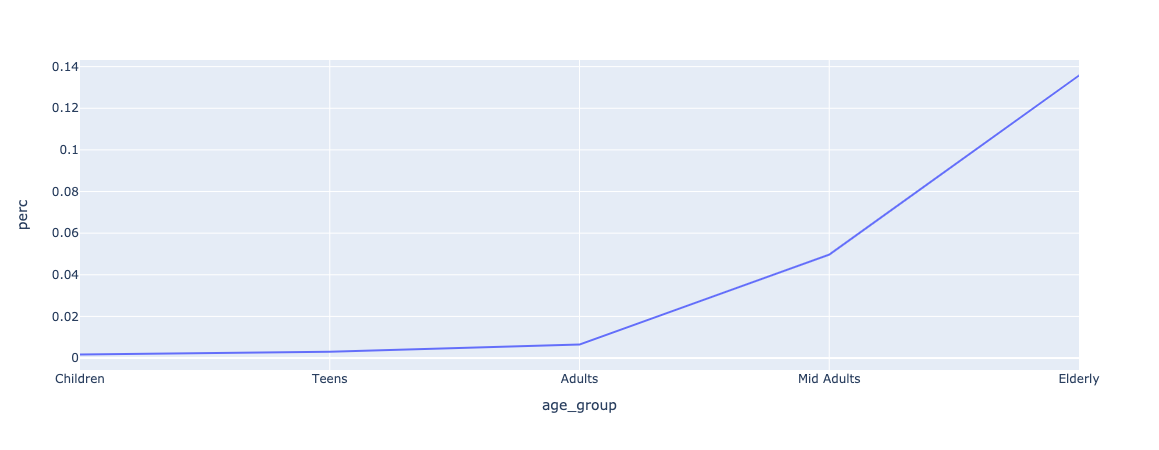

In [28]:
px.line(cdf,x = 'age_group',y = 'perc')

# conclusion

#### with the increase in the age the patients are more vulnerable to  stroke

In [29]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.065758   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke   age_group  
0  formerly smoked       1     Elderly  
1     never smoked       1     Elderly  
2     never smoked       1     Elderly  
3           smokes       1  Mid Adults  
4     never smoked       1     Elderly

In [30]:
ht_df = pd.crosstab(data['hypertension'],data['stroke'])
ht_df['perc'] = ht_df[1]/(ht_df[0]+ht_df[1])
ht_df['hyper_tension'] = ht_df.index
ht_df

<IPython.core.display.Javascript object>

stroke           0    1      perc  hyper_tension
hypertension                                    
0             4429  183  0.039679              0
1              432   66  0.132530              1

<IPython.core.display.Javascript object>

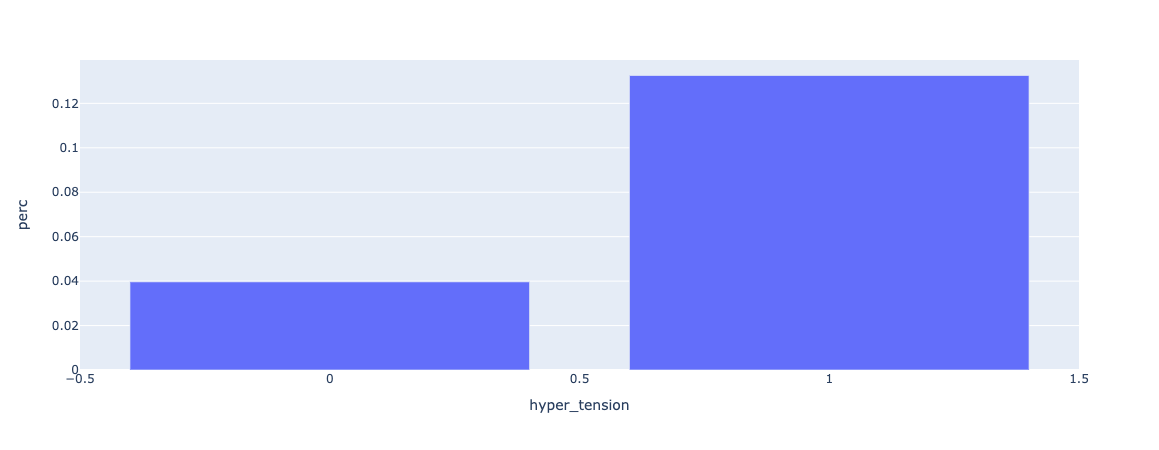

In [31]:
px.bar(ht_df,x = 'hyper_tension',y = 'perc')

In [32]:
table = pd.crosstab(data['hypertension'],data['stroke'])
chi_square_test(table)

<IPython.core.display.Javascript object>

('dependent', 1.661621901511823e-19)

# conclusion
#### People with hypertension are more prone to get a stroke compared to people without hypertension

In [33]:
hd_df = pd.crosstab(data['heart_disease'],data['stroke'])
hd_df['perc'] = hd_df[1]/(hd_df[0]+hd_df[1])
hd_df['heart_disease'] = hd_df.index
hd_df

<IPython.core.display.Javascript object>

stroke            0    1      perc  heart_disease
heart_disease                                    
0              4632  202  0.041787              0
1               229   47  0.170290              1

In [35]:
table = pd.crosstab(data['heart_disease'],data['stroke'])
chi_square_test(table)

<IPython.core.display.Javascript object>

('dependent', 2.0887845685229236e-21)

<IPython.core.display.Javascript object>

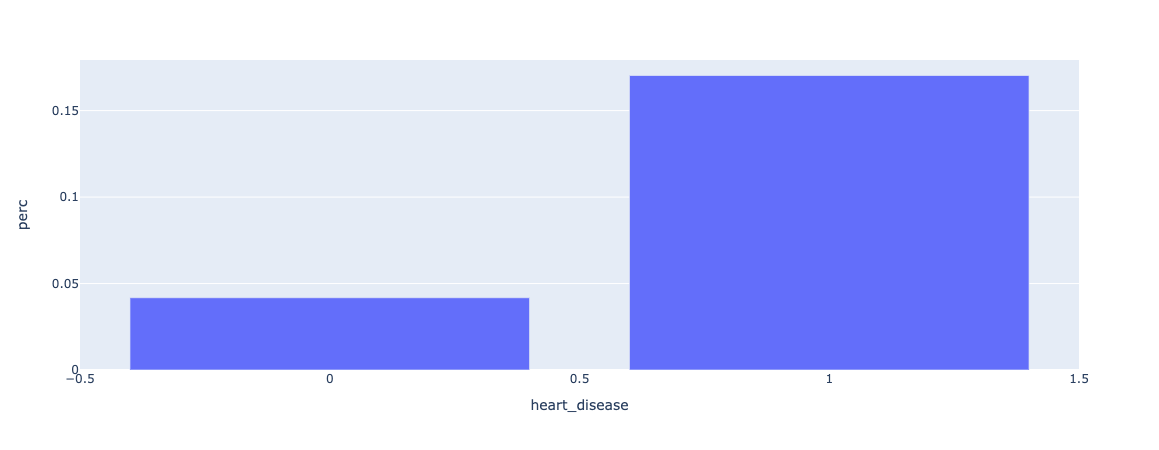

In [36]:
px.bar(hd_df,x = 'heart_disease',y='perc')

# conclusion
#### People with heart disease are more prone to get a stroke compared to people without heart_disease

In [34]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.065758   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke   age_group  
0  formerly smoked       1     Elderly  
1     never smoked       1     Elderly  
2     never smoked       1     Elderly  
3           smokes       1  Mid Adults  
4     never smoked       1     Elderly

In [35]:
data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [36]:
m_df = pd.crosstab(data['ever_married'],data['stroke'])
m_df['perc'] = m_df[1]/(m_df[0]+m_df[1])
m_df['ever_married'] = m_df.index
m_df

<IPython.core.display.Javascript object>

stroke           0    1      perc ever_married
ever_married                                  
No            1728   29  0.016505           No
Yes           3133  220  0.065613          Yes

In [37]:
chi_square_test(pd.crosstab(data['ever_married'],data['stroke']))

<IPython.core.display.Javascript object>

('dependent', 1.6389021142314745e-14)

<IPython.core.display.Javascript object>

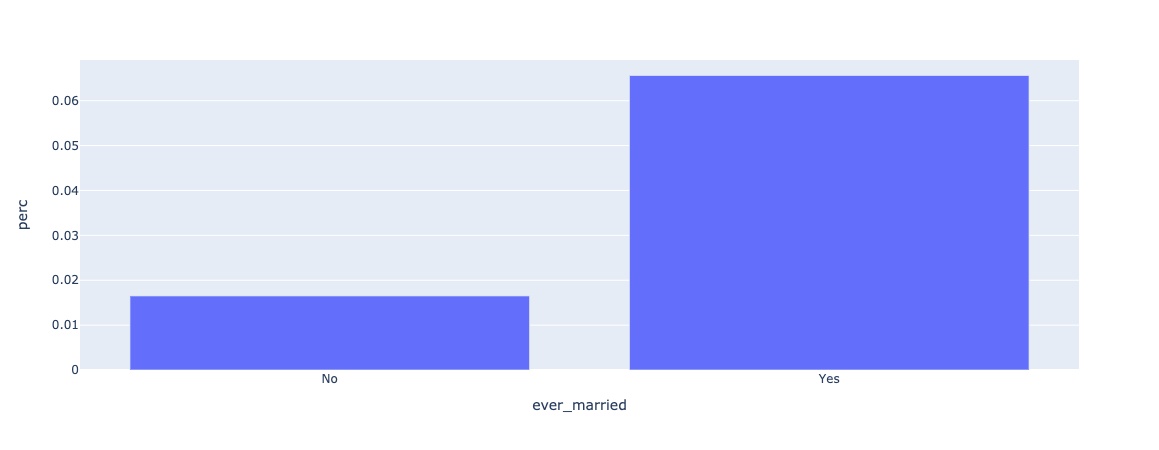

In [43]:
px.bar(m_df,x ='ever_married',y = 'perc')

# conclusion
####  the persons marital history is affecting his chance of getting the stroke
#### i think its because of the age column

# lets test the dependency between age and marital history

In [45]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.065758   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke   age_group  
0  formerly smoked       1     Elderly  
1     never smoked       1     Elderly  
2     never smoked       1     Elderly  
3           smokes       1  Mid Adults  
4     never smoked       1     Elderly

<IPython.core.display.Javascript object>

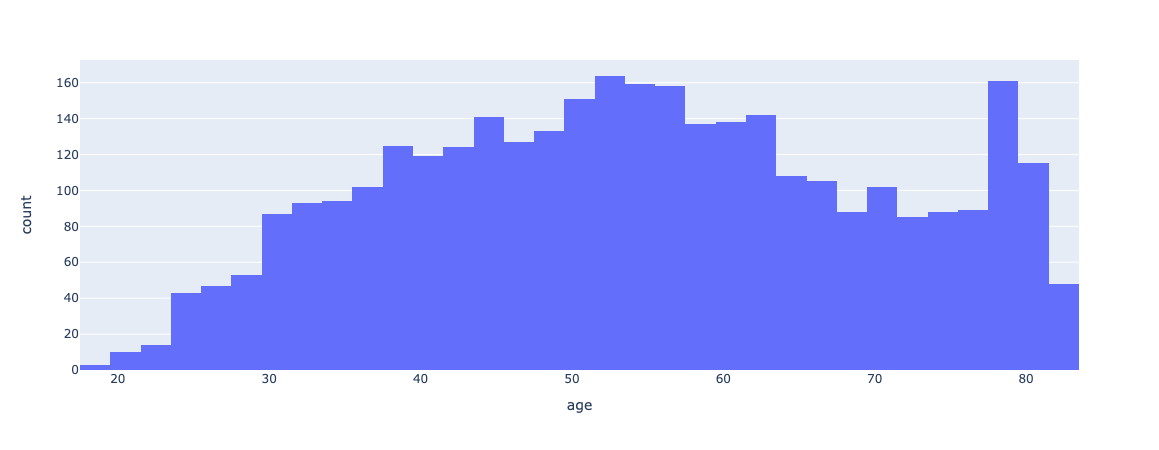

In [50]:
px.histogram(data[data['ever_married']=='Yes'],x='age')

<IPython.core.display.Javascript object>

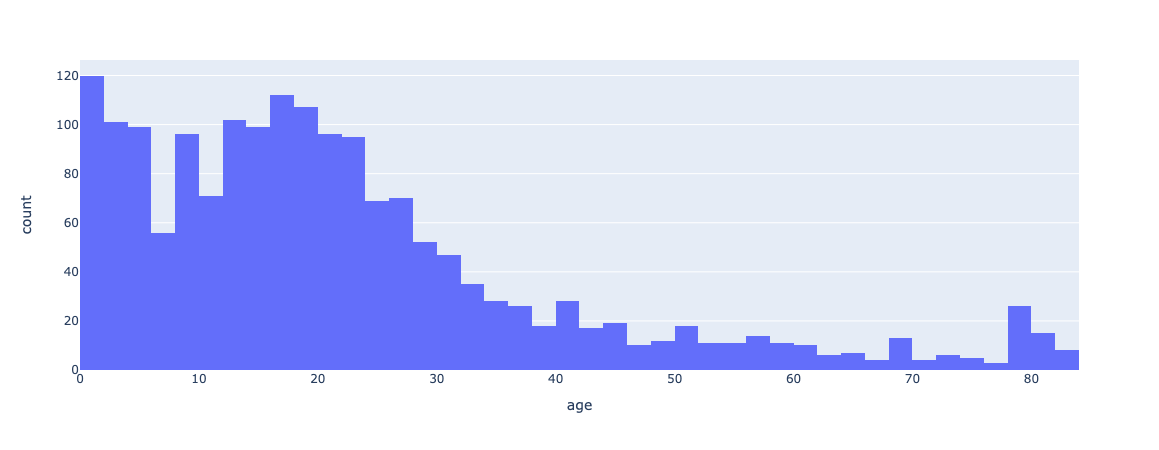

In [51]:
px.histogram(data[data['ever_married']=='No'],x='age')

<IPython.core.display.Javascript object>

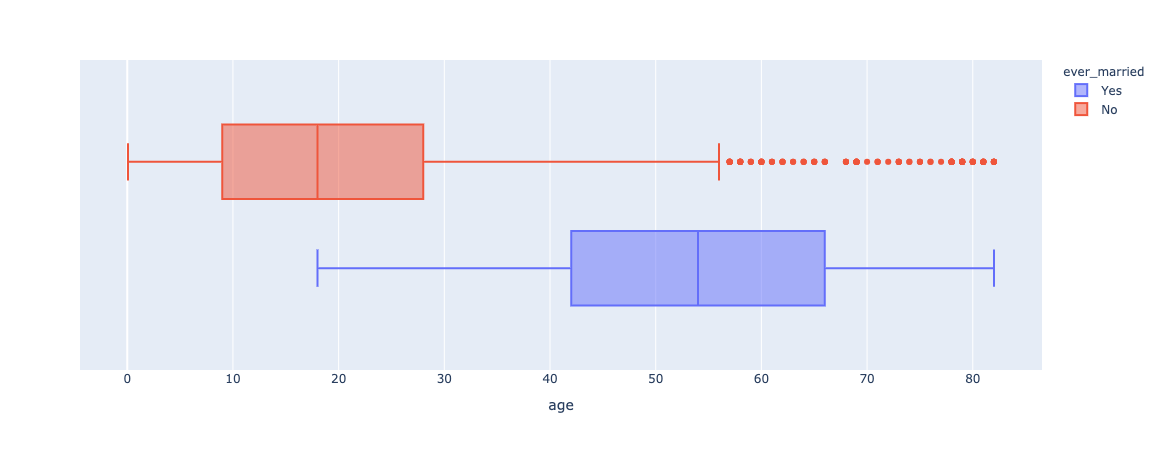

In [52]:
px.box(data,x='age',color = 'ever_married')

In [53]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.065758   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke   age_group  
0  formerly smoked       1     Elderly  
1     never smoked       1     Elderly  
2     never smoked       1     Elderly  
3           smokes       1  Mid Adults  
4     never smoked       1     Elderly

In [54]:
data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [200]:
wt_df = pd.crosstab(data['work_type'],data['stroke'])
wt_df['perc'] = wt_df[1]/(wt_df[0]+wt_df[1])
wt_df['work_type'] = wt_df.index
wt_df

<IPython.core.display.Javascript object>

stroke            0    1      perc      work_type
work_type                                        
Govt_job        624   33  0.050228       Govt_job
Never_worked     22    0  0.000000   Never_worked
Private        2776  149  0.050940        Private
Self-employed   754   65  0.079365  Self-employed
children        685    2  0.002911       children

In [201]:
chi_square_test(pd.crosstab(data['work_type'],data['stroke']))

<IPython.core.display.Javascript object>

('dependent', 5.397707801896119e-10)

<IPython.core.display.Javascript object>

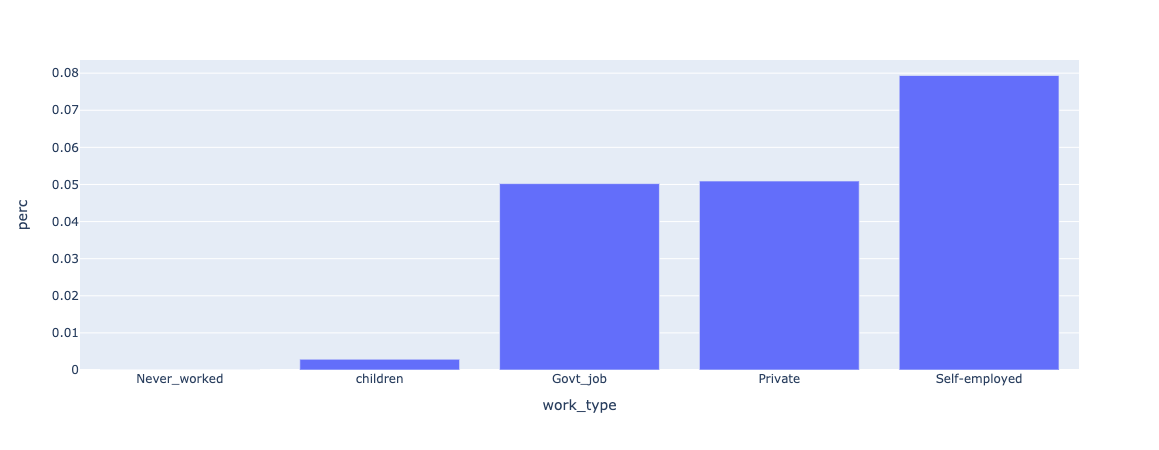

In [202]:
px.bar(wt_df.sort_values(by = 'perc',axis = 0),x='work_type',y='perc')

# Conclusion
#### people who have never worked and children are less prone to stroke

In [204]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.065758   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke   age_group  
0  formerly smoked       1     Elderly  
1     never smoked       1     Elderly  
2     never smoked       1     Elderly  
3           smokes       1  Mid Adults  
4     never smoked       1     Elderly

In [205]:
data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [206]:
rt_df = pd.crosstab(data['Residence_type'],data['stroke'])
rt_df['perc'] = rt_df[1]/(rt_df[0]+rt_df[1])
rt_df['residence_type'] = rt_df.index
rt_df

<IPython.core.display.Javascript object>

stroke             0    1      perc residence_type
Residence_type                                    
Rural           2400  114  0.045346          Rural
Urban           2461  135  0.052003          Urban

In [207]:
chi_square_test(pd.crosstab(data['Residence_type'],data['stroke']))

<IPython.core.display.Javascript object>

('independent', 0.29833169286876987)

# Conclusion

#####  the person's living place is irrevalant to his chance of gettting stroke

In [210]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.065758   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke   age_group  
0  formerly smoked       1     Elderly  
1     never smoked       1     Elderly  
2     never smoked       1     Elderly  
3           smokes       1  Mid Adults  
4     never smoked       1     Elderly

In [211]:
data['bmi'].describe()

count    5110.000000
mean       28.891519
std         7.698134
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

<IPython.core.display.Javascript object>

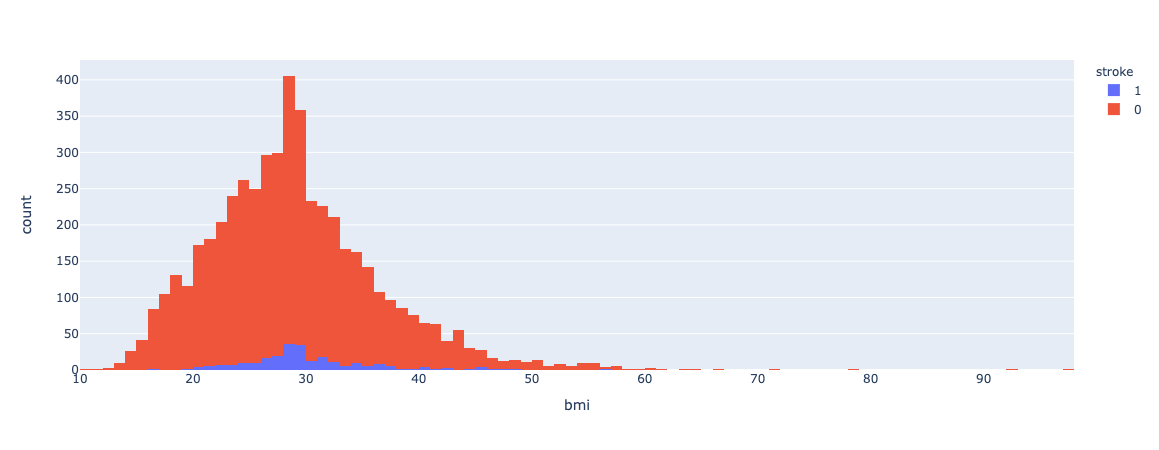

In [212]:
px.histogram(data,x='bmi',color = 'stroke')

<IPython.core.display.Javascript object>

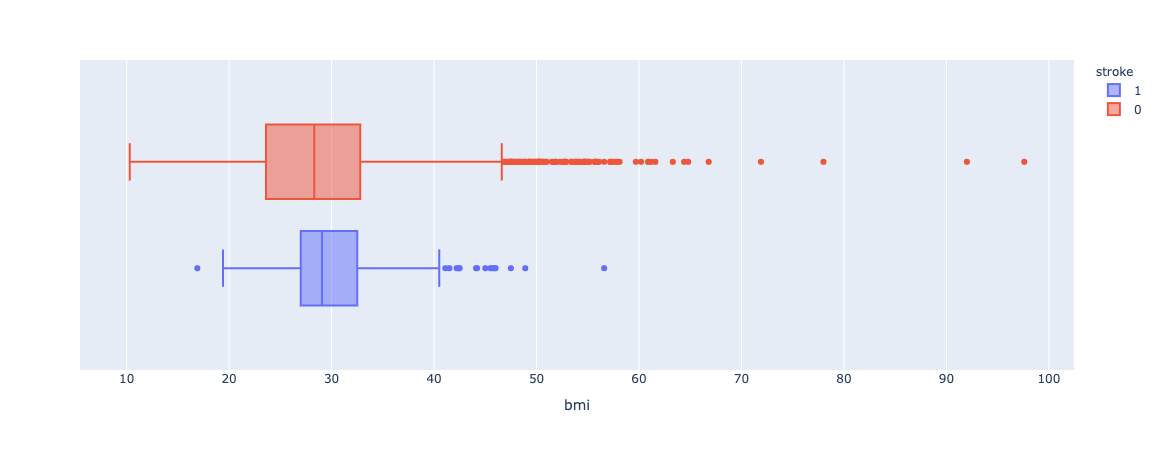

In [213]:
px.box(data,x ='bmi',color = 'stroke')

In [214]:
data[data['stroke']==1]['bmi'].describe()

count    249.000000
mean      30.213621
std        5.827151
min       16.900000
25%       27.000000
50%       29.065758
75%       32.500000
max       56.600000
Name: bmi, dtype: float64

In [215]:
data[data['stroke']==0]['bmi'].describe()

count    4861.000000
mean       28.823796
std         7.776286
min        10.300000
25%        23.600000
50%        28.300000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [216]:
from scipy.stats import ttest_ind
s,p = ttest_ind(np.array(data[data['stroke']==1]['bmi']),np.array(data[data['stroke']==0]['bmi']),equal_var=False)
print(p)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.00036922399707938847


# Conclusion

##### The two distributions are different

In [217]:
# Categorising the bmi column
data['bmi_cat'] = pd.cut(data['bmi'],bins = [0,19,25,30,100],labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])

<IPython.core.display.Javascript object>

In [218]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.065758   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke   age_group     bmi_cat  
0  formerly smoked       1     Elderly     Obesity  
1     never smoked       1     Elderly  Overweight  
2     never smoked       1     Elderly     Obesity  
3           smokes       1  Mid Adults     Obesity  
4     never smoked       1     Elderly       Ideal

In [219]:
chi_square_test(pd.crosstab(data['bmi_cat'],data['stroke']).to_numpy())

<IPython.core.display.Javascript object>

('dependent', 8.268554930786456e-10)

In [220]:
bc_df = pd.crosstab(data['bmi_cat'],data['stroke'])
bc_df['perc'] = bc_df[1]/(bc_df[0]+bc_df[1])
bc_df['bmi_cat'] = bc_df.index
bc_df

<IPython.core.display.Javascript object>

stroke          0    1      perc      bmi_cat
bmi_cat                                      
Underweight   410    1  0.002433  Underweight
Ideal        1159   37  0.030936        Ideal
Overweight   1495  115  0.071429   Overweight
Obesity      1797   96  0.050713      Obesity

<IPython.core.display.Javascript object>

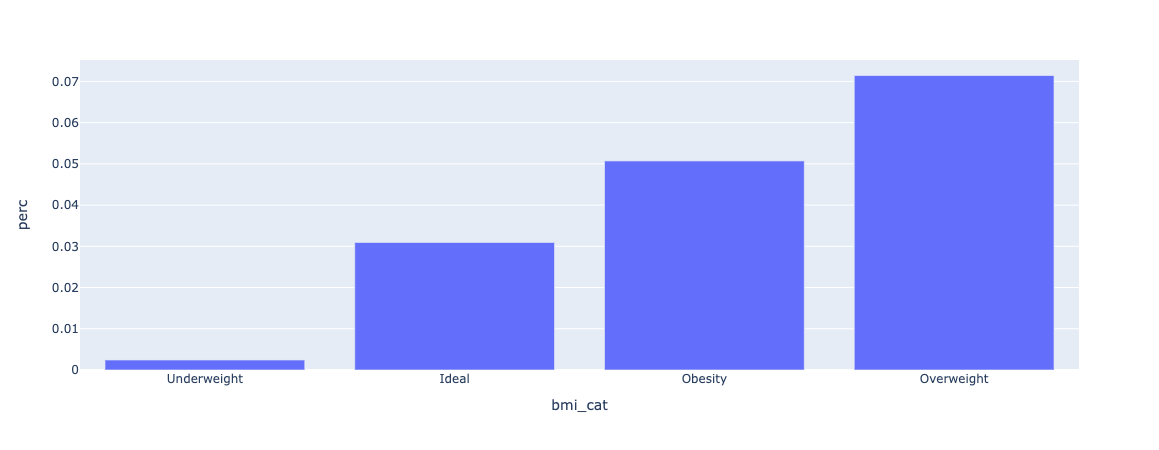

In [222]:
px.bar(bc_df.sort_values('perc'),x = 'bmi_cat',y = 'perc')

In [154]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [155]:
ss_df = pd.crosstab(data['smoking_status'],data['stroke'])
ss_df['perc'] = ss_df[1]/(ss_df[0]+ss_df[1])
ss_df['smoking_status'] = ss_df.index
ss_df

<IPython.core.display.Javascript object>

stroke              0   1      perc   smoking_status
smoking_status                                      
Unknown          1497  47  0.030440          Unknown
formerly smoked   815  70  0.079096  formerly smoked
never smoked     1802  90  0.047569     never smoked
smokes            747  42  0.053232           smokes

In [156]:
chi_square_test(pd.crosstab(data['smoking_status'],data['stroke']))

<IPython.core.display.Javascript object>

('dependent', 2.0853997025008455e-06)

In [157]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.065758   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  age_bins  
0  formerly smoked       1  below_70  
1     never smoked       1  below_70  
2     never smoked       1  below_80  
3           smokes       1  below_50  
4     never smoked       1  below_80

<IPython.core.display.Javascript object>

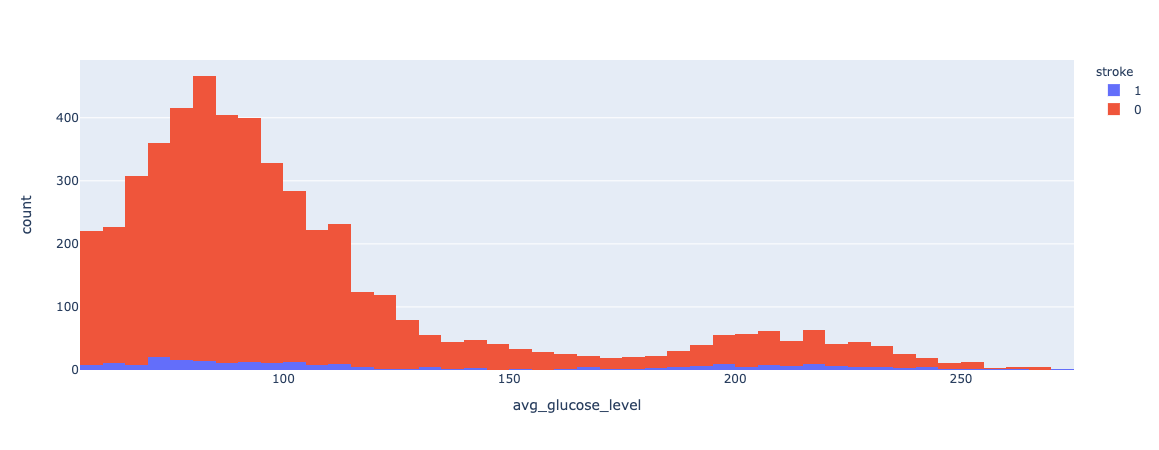

In [158]:
px.histogram(data,x='avg_glucose_level',color = 'stroke')

<IPython.core.display.Javascript object>

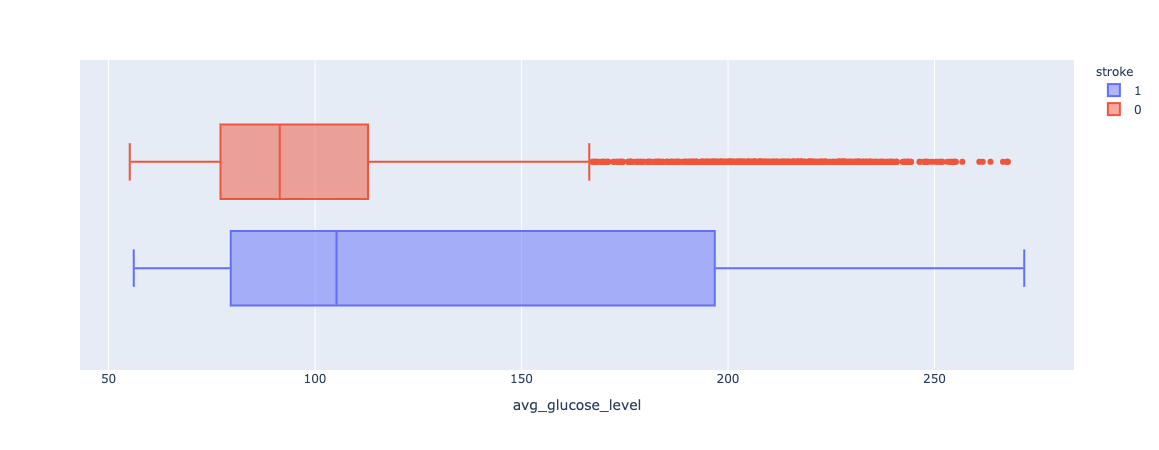

In [159]:
px.box(data,x='avg_glucose_level',color = 'stroke')

# BiVariate Analysis


In [223]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.065758   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke   age_group     bmi_cat  
0  formerly smoked       1     Elderly     Obesity  
1     never smoked       1     Elderly  Overweight  
2     never smoked       1     Elderly     Obesity  
3           smokes       1  Mid Adults     Obesity  
4     never smoked       1     Elderly       Ideal

<IPython.core.display.Javascript object>

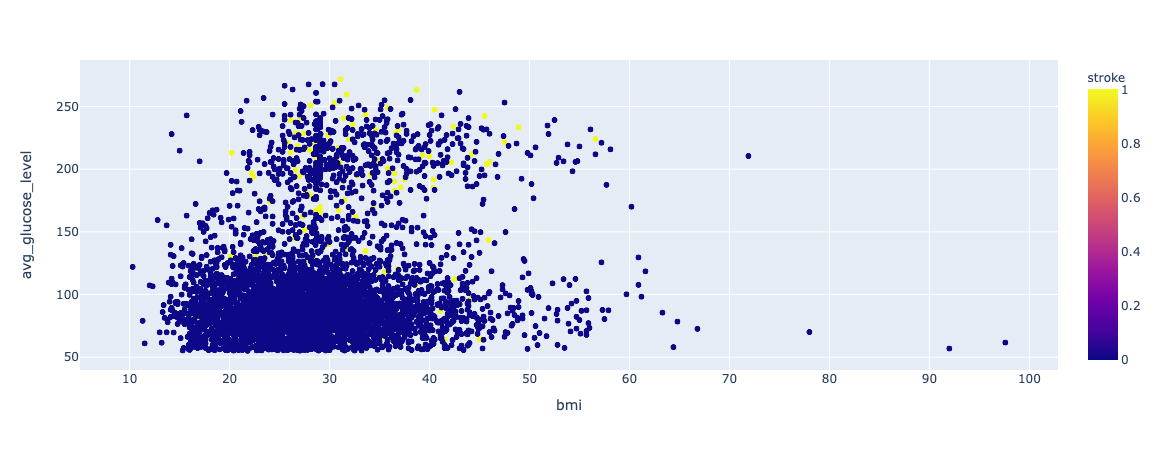

In [228]:
px.scatter(data,x='bmi',y='avg_glucose_level',color = 'stroke')

In [229]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1,cols = 2)

In [230]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.065758   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke   age_group     bmi_cat  
0  formerly smoked       1     Elderly     Obesity  
1     never smoked       1     Elderly  Overweight  
2     never smoked       1     Elderly     Obesity  
3           smokes       1  Mid Adults     Obesity  
4     never smoked       1     Elderly       Ideal

In [246]:
pd.crosstab(data['hypertension'],data['gender'])

<IPython.core.display.Javascript object>

gender        Female  Male  Other
hypertension                     
0               2718  1893      1
1                276   222      0

<IPython.core.display.Javascript object>

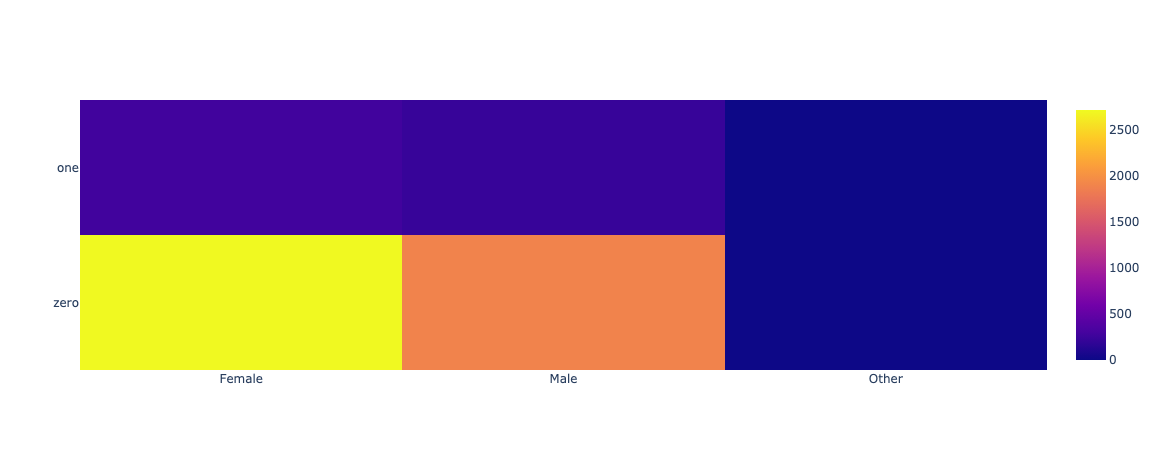

In [248]:
fig = go.Figure(data = go.Heatmap(z = pd.crosstab(data['hypertension'],data['gender']).to_numpy(),x = ['Female','Male','Other'],y=['zero','one']))
fig.show()

# Features  selected after checking the correlation between predictor variables and target varible
1. age
2. hypertension
3. heart_disease
4. ever_married
5. work_type
6. avg_glucose_level
7. bmi
8. smoking_status

## dropping the below variables 
1. id
2. gender
3. Residence_type

In [77]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.065758   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke   age_group  
0  formerly smoked       1     Elderly  
1     never smoked       1     Elderly  
2     never smoked       1     Elderly  
3           smokes       1  Mid Adults  
4     never smoked       1     Elderly

In [78]:
nd = data.drop(['id','gender','Residence_type'],axis = 1)

In [79]:
nd.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [80]:
nd.head()

age  hypertension  heart_disease ever_married      work_type  \
0  67.0             0              1          Yes        Private   
1  61.0             0              0          Yes  Self-employed   
2  80.0             0              1          Yes        Private   
3  49.0             0              0          Yes        Private   
4  79.0             1              0          Yes  Self-employed   

   avg_glucose_level        bmi   smoking_status  stroke   age_group  
0             228.69  36.600000  formerly smoked       1     Elderly  
1             202.21  29.065758     never smoked       1     Elderly  
2             105.92  32.500000     never smoked       1     Elderly  
3             171.23  34.400000           smokes       1  Mid Adults  
4             174.12  24.000000     never smoked       1     Elderly

In [83]:
ag_dict = {'Elderly':4,'Mid Adults':3,'Adults': 2, 'Teens':1,'Children':0}
nd['age_group'] = nd['age_group'].map(ag_dict)
em_dict = {'No':0,'Yes':1}
nd['ever_married'] = nd['ever_married'].map(em_dict)
wt_dict = {'Never_worked':0,'children':1,'Govt_job':2,'Private':3,'Self-employed':4}
nd['work_type'] = nd['work_type'].map(wt_dict)
ss_dict = {'Unknown':0,'never smoked':1,'smokes':2,'formerly smoked':3}
nd['smoking_status'] = nd['smoking_status'].map(ss_dict)

In [84]:
nd.head()

age  hypertension  heart_disease  ever_married  work_type  \
0  67.0             0              1             1          3   
1  61.0             0              0             1          4   
2  80.0             0              1             1          3   
3  49.0             0              0             1          3   
4  79.0             1              0             1          4   

   avg_glucose_level        bmi  smoking_status  stroke age_group  
0             228.69  36.600000               3       1         4  
1             202.21  29.065758               1       1         4  
2             105.92  32.500000               1       1         4  
3             171.23  34.400000               2       1         3  
4             174.12  24.000000               1       1         4

In [130]:
ohe_data = pd.get_dummies(nd[['work_type','smoking_status']])
nd = pd.concat([nd,ohe_data],axis = 1)
nd.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

age  hypertension  heart_disease  ever_married      work_type  \
0  67.0             0              1             1        Private   
1  61.0             0              0             1  Self-employed   
2  80.0             0              1             1        Private   
3  49.0             0              0             1        Private   
4  79.0             1              0             1  Self-employed   

   avg_glucose_level        bmi   smoking_status  stroke   age_group  \
0             228.69  36.600000  formerly smoked       1     Elderly   
1             202.21  29.065758     never smoked       1     Elderly   
2             105.92  32.500000     never smoked       1     Elderly   
3             171.23  34.400000           smokes       1  Mid Adults   
4             174.12  24.000000     never smoked       1     Elderly   

   work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                   0                       0                  1   
1                   0                       0                  0   
2                   0                       0                  1   
3                   0                       0                  1   
4                   0                       0                  0   

   work_type_Self-employed  work_type_children  smoking_status_Unknown  \
0                        0                   0                       0   
1                        1                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        1                   0                       0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   
2                               0                            1   
3                               0                            0   
4                               0                            1   

   smoking_status_smokes  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0

In [131]:
nd = nd.drop(['work_type','smoking_status','age_group'],axis = 1)
nd.head()

In [120]:
y = nd['stroke']
X= nd.drop(['stroke','age_group'],axis =1)

In [121]:
X.head()

age  hypertension  heart_disease  ever_married  work_type  \
0  67.0             0              1             1          3   
1  61.0             0              0             1          4   
2  80.0             0              1             1          3   
3  49.0             0              0             1          3   
4  79.0             1              0             1          4   

   avg_glucose_level        bmi  smoking_status  
0             228.69  36.600000               3  
1             202.21  29.065758               1  
2             105.92  32.500000               1  
3             171.23  34.400000               2  
4             174.12  24.000000               1

In [122]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

# Splitting the Data

In [200]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state = 42,stratify = y)

<IPython.core.display.Javascript object>

In [201]:
xtrain.dtypes

age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
dtype: object

In [202]:
xtrain.head()

age  hypertension  heart_disease  ever_married  work_type  \
2226  52.0             0              0             1          2   
3927  62.0             0              0             1          3   
3358  81.0             0              1             0          4   
4152  55.0             0              0             1          4   
4866  37.0             0              0             1          3   

      avg_glucose_level   bmi  smoking_status  
2226             107.84  22.0               3  
3927              88.32  36.3               0  
3358              95.49  29.4               0  
4152              73.57  28.0               2  
4866             103.66  36.1               2

In [203]:
xtest.head()

age  hypertension  heart_disease  ever_married  work_type  \
4223  52.0             0              0             1          4   
2230   8.0             0              0             0          1   
4612  30.0             0              0             0          3   
4100  17.0             0              0             0          3   
2983  31.0             0              0             1          3   

      avg_glucose_level   bmi  smoking_status  
4223              59.62  50.8               0  
2230              89.57  18.8               0  
4612             105.08  25.5               1  
4100             109.39  26.3               1  
2983              69.26  21.8               3

In [204]:
from sklearn.neighbors import  KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [205]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(ypred,ytest))

0.9452054794520548


In [206]:
pd.crosstab(ytest,ypred)

<IPython.core.display.Javascript object>

col_0      0   1
stroke          
0       1448  10
1         74   1

In [207]:
target_names = ['class 0', 'class 1']
print(classification_report(ytest,ypred,target_names= target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.99      0.97      1458
     class 1       0.09      0.01      0.02        75

    accuracy                           0.95      1533
   macro avg       0.52      0.50      0.50      1533
weighted avg       0.91      0.95      0.93      1533



In [208]:
y.value_counts()
print(250/4861)

0.05142974696564493


In [209]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [210]:
accuracy_score(ypred,ytest)

0.9178082191780822

In [211]:
pd.crosstab(ytest,ypred)

<IPython.core.display.Javascript object>

col_0      0   1
stroke          
0       1391  67
1         59  16

In [212]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1450
           1       0.21      0.19      0.20        83

    accuracy                           0.92      1533
   macro avg       0.58      0.58      0.58      1533
weighted avg       0.91      0.92      0.92      1533



In [213]:
importance = dt.feature_importances_
print(importance)

[0.18371827 0.02737188 0.03264724 0.02404452 0.04039599 0.38876761
 0.22925969 0.07379481]


In [214]:
df = pd.DataFrame({'feature_name':list(xtest.columns),'feature_importance':importance })
df.head()

<IPython.core.display.Javascript object>

feature_name  feature_importance
0            age            0.183718
1   hypertension            0.027372
2  heart_disease            0.032647
3   ever_married            0.024045
4      work_type            0.040396

<IPython.core.display.Javascript object>

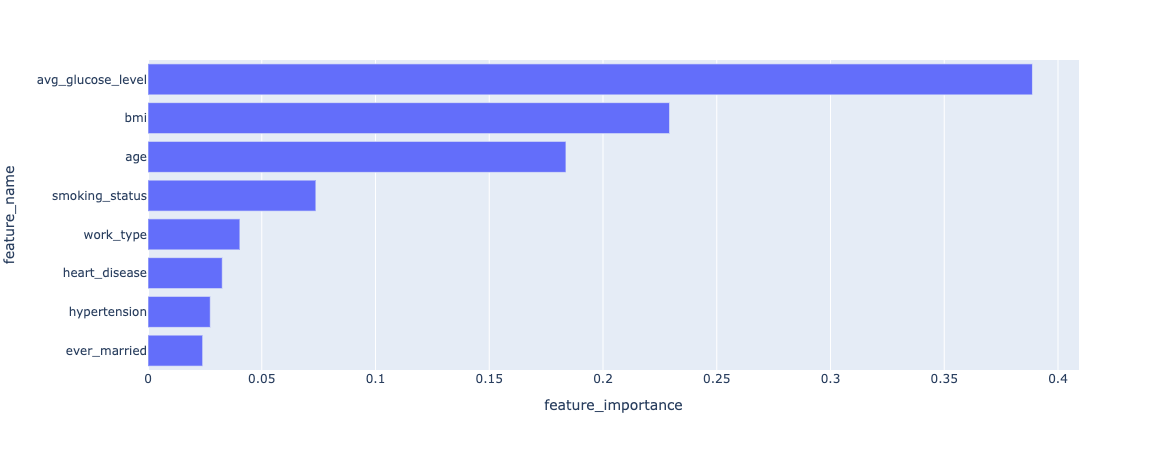

In [215]:
px.bar(df.sort_values('feature_importance'),y='feature_name',x='feature_importance')

In [169]:
feature_names = list(xtest.columns)

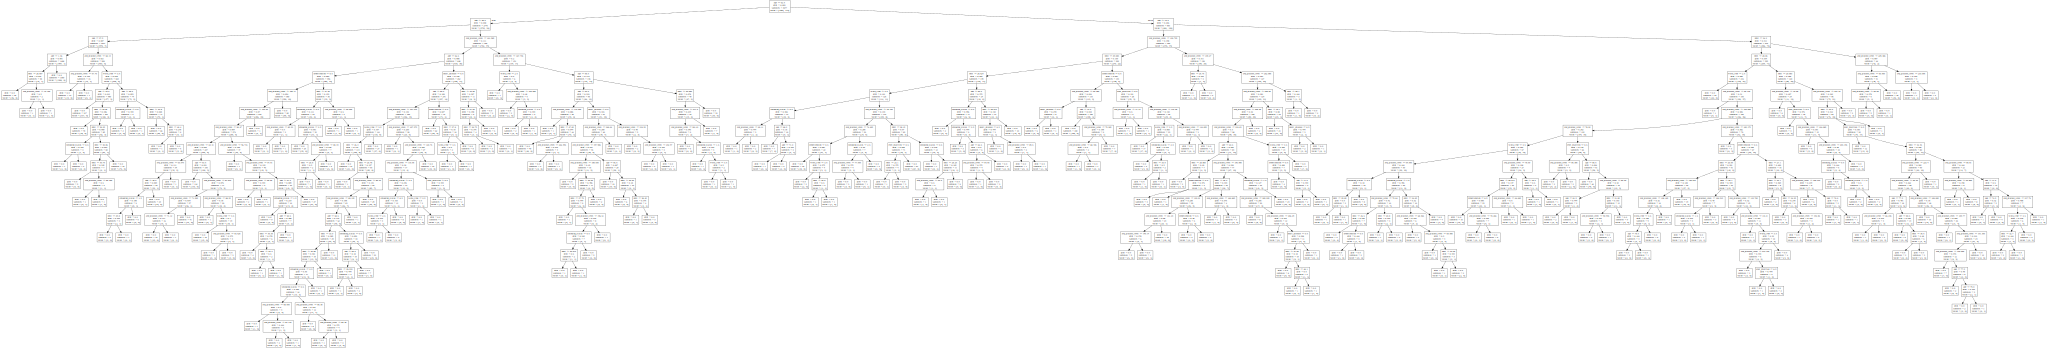

In [170]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(dt, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

In [217]:
import pdpbox

In [218]:
from pdpbox import pdp

<IPython.core.display.Javascript object>

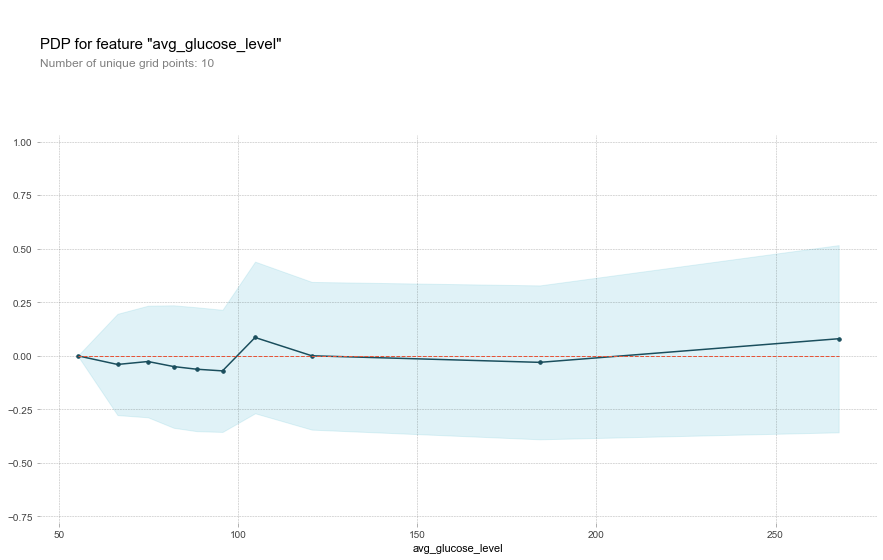

In [219]:
pdp_goals = pdp.pdp_isolate(model=dt, dataset=xtest, model_features=feature_names, feature='avg_glucose_level')
pdp.pdp_plot(pdp_goals,'avg_glucose_level')
plt.show()

<IPython.core.display.Javascript object>

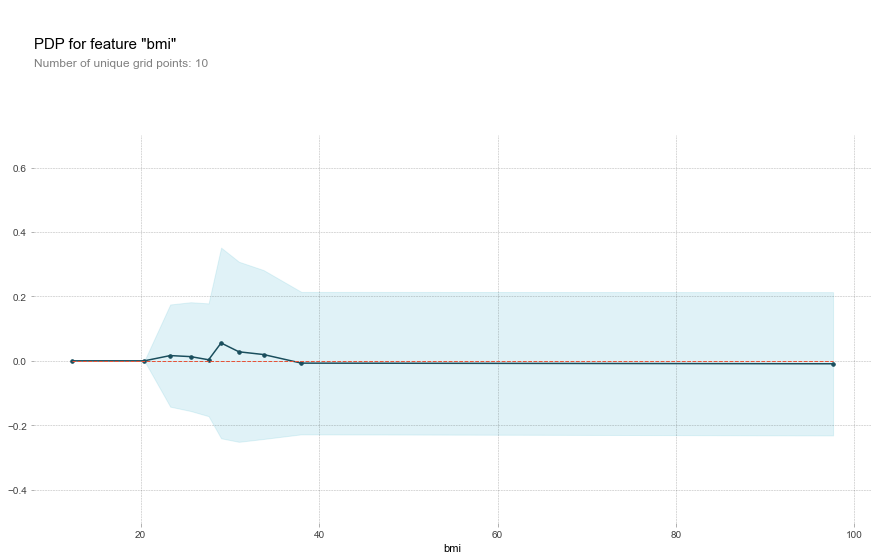

In [220]:
pdp_goals = pdp.pdp_isolate(model=dt, dataset=xtest, model_features=feature_names, feature='bmi')
pdp.pdp_plot(pdp_goals,'bmi')
plt.show()

<IPython.core.display.Javascript object>

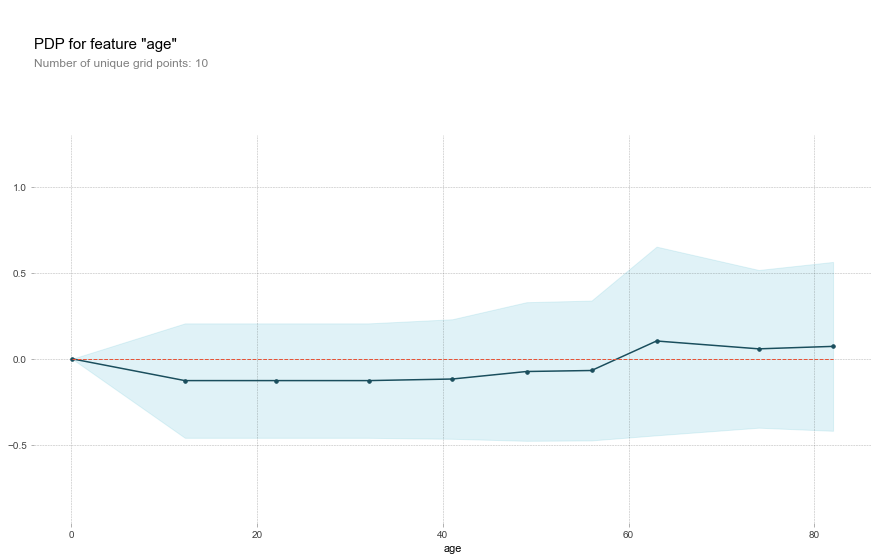

In [222]:
pdp_goals = pdp.pdp_isolate(model=dt, dataset=xtest, model_features=feature_names, feature='age')
pdp.pdp_plot(pdp_goals,'age')
plt.show()

<IPython.core.display.Javascript object>

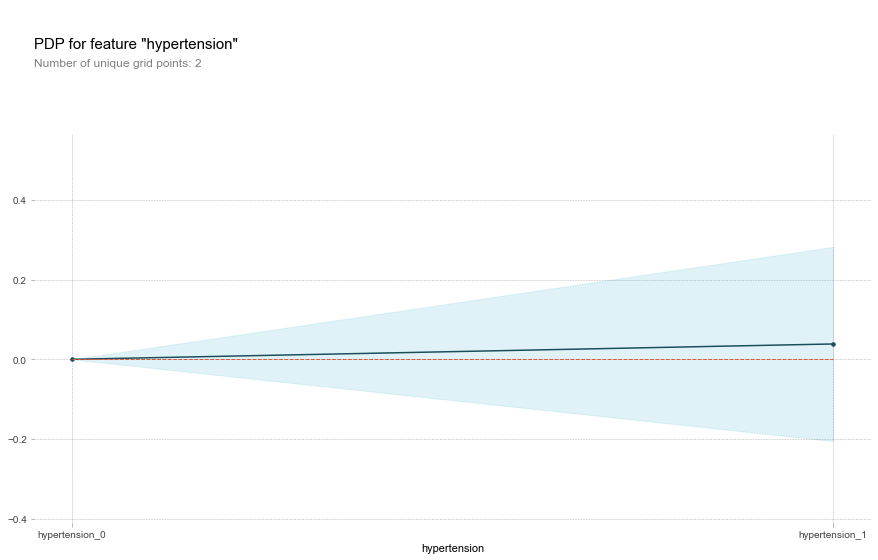

In [223]:
pdp_goals = pdp.pdp_isolate(model=dt, dataset=xtest, model_features=feature_names, feature='hypertension')
pdp.pdp_plot(pdp_goals,'hypertension')
plt.show()

<IPython.core.display.Javascript object>

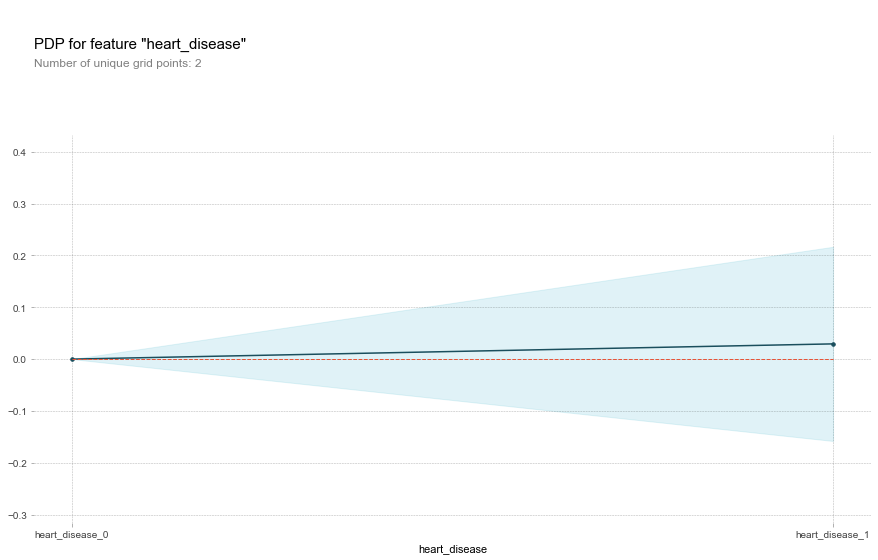

In [225]:
pdp_goals = pdp.pdp_isolate(model=dt, dataset=xtest, model_features=feature_names, feature='heart_disease')
pdp.pdp_plot(pdp_goals,'heart_disease')
plt.show()

<IPython.core.display.Javascript object>

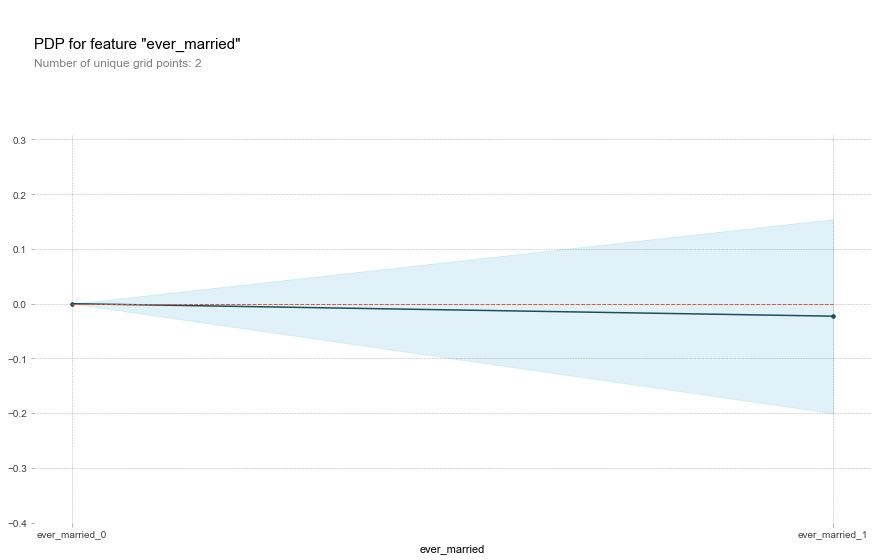

In [226]:
pdp_goals = pdp.pdp_isolate(model=dt, dataset=xtest, model_features=feature_names, feature='ever_married')
pdp.pdp_plot(pdp_goals,'ever_married')
plt.show()

In [221]:
xtest.head()

age  hypertension  heart_disease  ever_married  work_type  \
4223  52.0             0              0             1          4   
2230   8.0             0              0             0          1   
4612  30.0             0              0             0          3   
4100  17.0             0              0             0          3   
2983  31.0             0              0             1          3   

      avg_glucose_level   bmi  smoking_status  
4223              59.62  50.8               0  
2230              89.57  18.8               0  
4612             105.08  25.5               1  
4100             109.39  26.3               1  
2983              69.26  21.8               3

# results with one hot encoding

In [162]:
accuracy_score(ypred,ytest)

0.9080234833659491

In [179]:
pd.crosstab(ytest,ypred)

<IPython.core.display.Javascript object>

col_0      0   1
stroke          
0       1379  79
1         62  13

In [163]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1441
           1       0.17      0.14      0.16        92

    accuracy                           0.91      1533
   macro avg       0.56      0.55      0.55      1533
weighted avg       0.90      0.91      0.90      1533



In [164]:
importance = dt.feature_importances_
print(importance)

[0.21869782 0.02887664 0.02605207 0.01667156 0.32231027 0.23247693
 0.01175416 0.         0.03217777 0.02202981 0.         0.02552844
 0.01722939 0.03834609 0.00784905]


In [165]:
xtest.shape

(1533, 15)

In [170]:
list(xtest.columns)

['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'avg_glucose_level',
 'bmi',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [174]:
df = pd.DataFrame({'feature_name':list(xtest.columns),'feature_importance':importance })
df.head()

<IPython.core.display.Javascript object>

feature_name  feature_importance
0                age            0.218698
1       hypertension            0.028877
2      heart_disease            0.026052
3       ever_married            0.016672
4  avg_glucose_level            0.322310

<IPython.core.display.Javascript object>

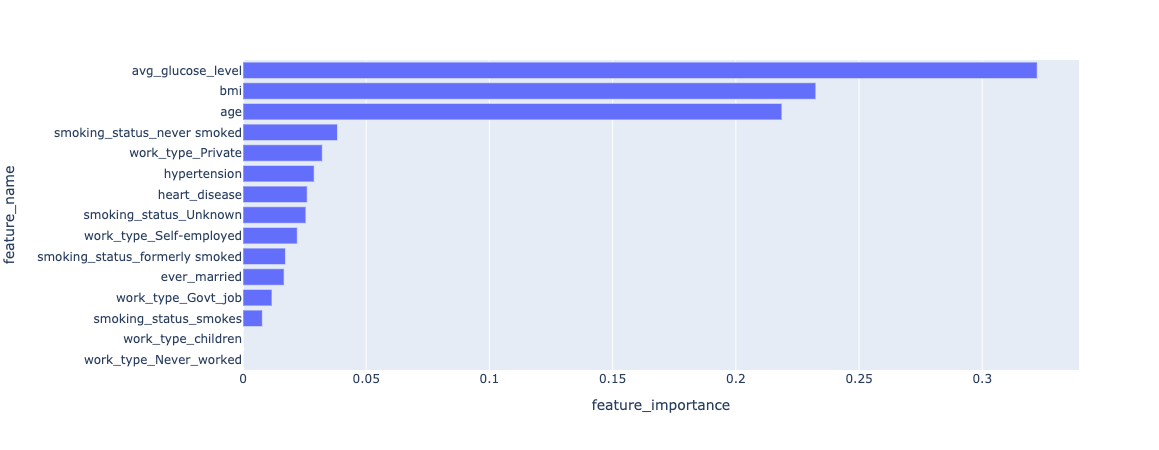

In [182]:
px.bar(df.sort_values('feature_importance'),y='feature_name',x='feature_importance')

In [37]:
# applying smote
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote,y_train_smote = smote.fit_resample(xtrain,ytrain)

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_smote,y_train_smote)
ypred = dt.predict(xtest)

In [40]:
accuracy_score(ypred,ytest)

0.8623613829093281

In [41]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1357
           1       0.27      0.11      0.16       176

    accuracy                           0.86      1533
   macro avg       0.58      0.54      0.54      1533
weighted avg       0.82      0.86      0.84      1533

